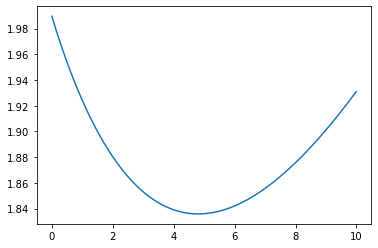

In [92]:
#!/usr/bin/python3.7
#RidgeRegression.ipynb
#Parth Parakh
#purpose: this file performs Ridge regression using gradient descent
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------------------------
#helper function
def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d

#---------------------------------------------------------------------
def myRidgeRegression0(y,X,alpha,tol,lambdaa) : 
    N=len(X); #number of samples
    p=len(X[0]); #number of parameters (it includes the intercept)
    beta=np.zeros((p,1)); #parameters
    y = y.reshape(N,1)
    err=1.0;
    iteration=1;
    '''
    while (err>tol) : 
        a = (np.dot(X,beta)-y);
        a_T = np.transpose(a);
        J= np.dot(a_T,a);                           #objective function (RSS/2)
        gradient = 2*(np.dot(a_T,X)).transpose();       # gradient of J
        beta = beta-(alpha/N)*gradient;         #taking a step along the gradient
        a = (np.dot(X,beta)-y);
        a_T = np.transpose(a);
        err=np.abs(J-np.dot(a_T,a));                     #computing the change in J
        print(err)
        iteration=iteration+1;
    return beta, iteration;
    '''
    while (err>tol):
        
        a = X@beta-y;
        #print(np.shape(a))
        aT = np.transpose(a);
        betaT = np.transpose(beta)
        J = aT@a + lambdaa*(betaT@beta);              #objective function
        #print(np.shape(aT@a))
        gradient = 2*(aT@X).transpose()+lambdaa*beta;         #gradient of J
        
        beta = beta - (alpha/N)*gradient;                       #taking a step along the gradient
        
        a = X@beta-y;
        aT = np.transpose(a);
        betaT = np.transpose(beta)
        err=np.abs( J - (aT@a+lambdaa*(betaT@beta)) );    #computing the change in J
        #print(np.shape(err))
        iteration=iteration+1;
        
    return beta, iteration

#---------------------------------------------------------------------
if __name__ == '__main__':
    file = np.loadtxt(open("X.csv", "rb"), delimiter=",")
    X = (file)
    
    file = np.loadtxt(open("y.csv", "rb"), delimiter=",")
    y = (file)
    
    p = len(X[0]);
    N = len(X);

    XTrain = X[0:70,:];
    yTrain = y[0:70];

    XTest = X[70:100,:];
    yTest = y[70:100];


    MSE=[];
    L=[];
    for lambdaa in np.arange(0.0,10,0.01):
        XTrainTr = np.transpose(XTrain);      
        beta = np.linalg.inv((XTrainTr@XTrain)+lambdaa*np.identity(p)) @ (XTrainTr@yTrain );    
        #beta, iteration = myRidgeRegression0(yTrain,XTrain,0.01,1e-9,lambdaa)   
        yHat = XTest@beta;    
        b = np.mean((yHat-yTest)**2)
        MSE = np.append(MSE,b);
        L = np.append(L,lambdaa);

    plt.plot(L,MSE)